 # Отток клиентов телекомуникационной компании
    
 ## Описание задачи


 Датасет содержит данные о клиентах телекомуникационной компании. Необходимо определить какие из текущих пользователей останутся клиентами компании, а какие перестанут ими быть.

## Чтение данных

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

In [78]:
file = "churn.csv"
data = pd.read_csv(file)

 Выведем количество строк и столбцов

In [79]:
data.shape

(6499, 21)

In [80]:
data.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Заметим, что строка соответствует конкретному клиенту, а столбцы информации о нём. Всего в датасете содержится 21 признак:

In [81]:
list(data.columns.values)

['CustomerID',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Total Charges',
 'Churn']

Для удобства исключим первый столбец, так как он не влияет на классификацию

In [82]:
data = data.drop(columns = 'CustomerID')
data.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Визуализация данных и вычисление основных характеристик

Для количественных призназнаков выведем основные характеристики, где 
1. count - количество значений для каждого признака
2. mean - среднее значение
3. std - стандартное отклонение
4. min - минимальное значение
5. 50% - медиана
6. 25% и 75% - первый и третий квартиль
7. max - максимальное значени

In [83]:
data.describe()

,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges
count,6499.000000,6499.000000,6499.000000,6499.000000,6490.000000
mean,0.506232,0.162487,32.369134,64.733344,2282.935177
std,0.500000,0.368925,24.584693,30.136193,2270.034922
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,9.000000,35.400000,399.300000
50%,1.000000,0.000000,29.000000,70.350000,1397.100000
75%,1.000000,0.000000,55.000000,89.850000,3786.612500
max,1.000000,1.000000,72.000000,118.750000,8684.800000


Теперь для категориальных признаков выведем характеристики, где
1. count - количество
2. unique - количество уникальных значени
3. top - наиболее часто встречающее значение
4. freq - частота наиболее часто встречающегося значения

In [84]:
data.describe(include=['object'])

,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn
count,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499
unique,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3359,4561,5884,3138,2860,3208,2855,2843,3209,2589,2555,3576,3836,2182,4784


Рассчитаем матрицу корреляции и представим ее графически

In [85]:
corr_matrix = data.corr()
corr_matrix

,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges
Gender,1.000000,0.001184,0.009096,-0.012448,0.003193
Senior Citizen,0.001184,1.000000,0.015732,0.220096,0.102562
Tenure,0.009096,0.015732,1.000000,0.248949,0.825554
Monthly Charges,-0.012448,0.220096,0.248949,1.000000,0.651688
Total Charges,0.003193,0.102562,0.825554,0.651688,1.000000


<AxesSubplot:>

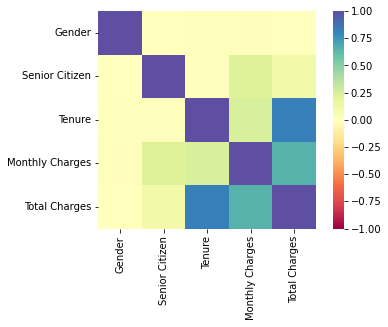

In [86]:
sns.heatmap(corr_matrix, cmap='Spectral', square=True, vmin=-1.0, vmax=1.0)

Корреляция наблюдается между признаками "Tenure" и "Total Charges".

## Обработка пропущенных значений

In [87]:
data.isna().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        9
Churn                0
dtype: int64

Заметим, что пропущенные значения существуют только в признаке "Total Charges". Вычислим медиану для данного числового значение и заполним ей пропущенные. Убедимся в отсутствии пропущенных значений

In [88]:
arrival_median = data['Total Charges'].median(axis = 0)
data['Total Charges'].fillna(arrival_median, inplace = True)
data.isnull().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

##  Обработка категориальных признаков

Разделим признаки на категориальные и числовые

In [89]:
num_colum = [c for c in data.columns if data[c].dtype.name != 'object']
categor_colum = [c for c in data.columns if data[c].dtype.name == 'object']
categor_colum.remove('Churn')
data_describe = data.describe(include = ['object'])

Разделим категориальные признаки на бинарные и небинарные

In [90]:
binary_colum = [c for c in categor_colum if data_describe[c]['unique'] == 2]
nonbinary_colum = [c for c in categor_colum if data_describe[c]['unique'] > 2]

Для бинарных признаков: заменим значения на 0 и 1

In [91]:
print(binary_colum)

['Partner', 'Dependents', 'Phone Service', 'Paperless Billing']


In [92]:
print(data['Partner'].unique())
print(data['Dependents'].unique())
print(data['Phone Service'].unique())
print(data['Paperless Billing'].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']


In [93]:
for col in binary_colum:
    data = data.replace({col: {'Yes': 0, 'No': 1}})
    print(data[col].describe())
    print()

count    6499.000000
mean        0.516849
std         0.499754
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Partner, dtype: float64

count    6499.000000
mean        0.701800
std         0.457503
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Dependents, dtype: float64

count    6499.000000
mean        0.094630
std         0.292726
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Phone Service, dtype: float64

count    6499.000000
mean        0.409755
std         0.491826
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Paperless Billing, dtype: float64



Для небинарных признаков: разделим каждый признак с s значениями на s признаков со значениями 0 и 1

In [94]:
data_nonbin = pd.get_dummies(data[nonbinary_colum])
data_nonbin.describe()

,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
count,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,...,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000
mean,0.482844,0.094630,0.422527,0.341129,0.440068,0.218803,0.493614,0.218803,0.287583,0.439298,...,0.393137,0.218803,0.388060,0.550238,0.208955,0.240806,0.219418,0.216341,0.335744,0.228497
std,0.499744,0.292726,0.493999,0.474125,0.496433,0.413466,0.499998,0.413466,0.452670,0.496340,...,0.488484,0.413466,0.487346,0.497508,0.406594,0.427606,0.413884,0.411781,0.472286,0.419897
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Нормализация числовых признаков

In [95]:
data_num = data[num_colum]
data_num.describe()

,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges
count,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000
mean,0.506232,0.162487,32.369134,64.733344,2281.708447
std,0.500000,0.368925,24.584693,30.136193,2268.701542
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,9.000000,35.400000,399.800000
50%,1.000000,0.000000,29.000000,70.350000,1397.100000
75%,1.000000,0.000000,55.000000,89.850000,3778.100000
max,1.000000,1.000000,72.000000,118.750000,8684.800000


Выполним нормализацию числовых данных

In [96]:
data_num = (data_num - data_num.mean()) / data_num.std()
data_num.describe()

,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges
count,6.499000e+03,6.499000e+03,6.499000e+03,6.499000e+03,6.499000e+03
mean,1.968985e-16,8.555158e-17,-1.212892e-16,-3.318216e-15,-1.856664e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.012464e+00,-4.404325e-01,-1.316638e+00,-1.542442e+00,-9.974465e-01
25%,-1.012464e+00,-4.404325e-01,-9.505563e-01,-9.733593e-01,-8.295090e-01
50%,9.875373e-01,-4.404325e-01,-1.370419e-01,1.863758e-01,-3.899184e-01
75%,9.875373e-01,-4.404325e-01,9.205267e-01,8.334383e-01,6.595806e-01
max,9.875373e-01,2.270146e+00,1.612014e+00,1.792418e+00,2.822360e+00


Соединим все столбцы в одну таблицу

In [97]:
data = pd.concat((data_num, data_nonbin, data[binary_colum], data['Churn']), axis = 1)
data.describe()

,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,...,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Partner,Dependents,Phone Service,Paperless Billing
count,6.499000e+03,6.499000e+03,6.499000e+03,6.499000e+03,6.499000e+03,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,...,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000
mean,1.968985e-16,8.555158e-17,-1.212892e-16,-3.318216e-15,-1.856664e-15,0.482844,0.094630,0.422527,0.341129,0.440068,...,0.208955,0.240806,0.219418,0.216341,0.335744,0.228497,0.516849,0.701800,0.094630,0.409755
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499744,0.292726,0.493999,0.474125,0.496433,...,0.406594,0.427606,0.413884,0.411781,0.472286,0.419897,0.499754,0.457503,0.292726,0.491826
min,-1.012464e+00,-4.404325e-01,-1.316638e+00,-1.542442e+00,-9.974465e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.012464e+00,-4.404325e-01,-9.505563e-01,-9.733593e-01,-8.295090e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.875373e-01,-4.404325e-01,-1.370419e-01,1.863758e-01,-3.899184e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,9.875373e-01,-4.404325e-01,9.205267e-01,8.334383e-01,6.595806e-01,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,9.875373e-01,2.270146e+00,1.612014e+00,1.792418e+00,2.822360e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Разбиение данных на обучающую и тестовую выборки

Разделим данные в процентном соотношении 85 к 15

In [98]:
X = data.drop(['Churn'], axis = 1)
y = data['Churn']


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_train.shape[0], X_test.shape[0]

(5524, 975)

## Классификатор ближайших соседей

Определим лучшее количество соседей из четырех предложенных. Для него найдем процент погрешности на обучающей и тестовой выборках

In [101]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

n = [1, 3, 5, 7, 9, 11, 13, 19]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': n})
grid.fit(X_train, y_train)

best_err = 1 - grid.best_score_
best_n = grid.best_estimator_.n_neighbors
print(best_err, best_n)

knn = KNeighborsClassifier(n_neighbors = best_n)
knn.fit(X_train, y_train)
err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)
print(err_train, err_test)

0.2161485999081907 13
0.18211440984793625 0.23589743589743595


Для оптимального (из 4х предложенных) числа соседей метод KNN показал приемлемый результат. Погрешность на тренировочной выборке порядка 18%, а на тестовой 23%. Эти данные получены при числе соседей равном 13 и объеме обучающей выборки равном 5524, а тестовой 975. Скорее всего, полученные результаты можно значительно улучшить, если применить другой метод классификации 